# Checkpoint 1

Reminder:

- You are being evaluated for compeletion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [ ]:
states = pd.read_csv('/content/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [ ]:
states.rename({               # rename variables to make them easier
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    })
states.rename(columns=str.lower, inplace = True) # make columns lowercase: easier
states.notna().sum()

primary_key                        1715
state                              1715
year                               1715
enroll                             1224
total_revenue                      1275
federal_revenue                    1275
state_revenue                      1275
local_revenue                      1275
total_expenditure                  1275
instruction_expenditure            1275
support_services_expenditure       1275
other_expenditure                  1224
capital_outlay_expenditure         1275
grades_pk_g                        1542
grades_kg_g                        1632
grades_4_g                         1632
grades_8_g                         1632
grades_12_g                        1632
grades_1_8_g                       1020
grades_9_12_g                      1071
grades_all_g                       1632
avg_math_4_score                    565
avg_math_8_score                    602
avg_reading_4_score                 650
avg_reading_8_score                 562


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 math


How many years of data are logged in our dataset?

In [ ]:
states['year'].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [ ]:
round(states.query(" state == 'MICHIGAN' | state == 'OHIO' ").groupby('state')['avg_math_8_score'].mean(),2)

state
MICHIGAN    276.17
OHIO        282.25
Name: avg_math_8_score, dtype: float64

Find the average for your chosen test across all states in 2019

In [ ]:
round(states.query(" year == 2019 ")['avg_math_8_score'].mean(),2)

281.26

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [ ]:
states.groupby('state')['avg_math_8_score'].max()

state
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:
states.columns

Index(['primary_key', 'state', 'year', 'enroll', 'total_revenue',
       'federal_revenue', 'state_revenue', 'local_revenue',
       'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'grades_pk_g', 'grades_kg_g',
       'grades_4_g', 'grades_8_g', 'grades_12_g', 'grades_1_8_g',
       'grades_9_12_g', 'grades_all_g', 'avg_math_4_score', 'avg_math_8_score',
       'avg_reading_4_score', 'avg_reading_8_score'],
      dtype='object')

In [ ]:
states['expenditure_per_student'] = states['total_expenditure']/states['enroll'] #expenditure per student
states['services_per_student'] = states['support_services_expenditure']/states['enroll'] #support services per student
states['services_percent_of_expenditure'] = states['support_services_expenditure']/states['total_expenditure'] # support services as percent of expenditure

In [ ]:
states

,primary_key,state,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,...,grades_1_8_g,grades_9_12_g,grades_all_g,avg_math_4_score,avg_math_8_score,avg_reading_4_score,avg_reading_8_score,expenditure_per_student,services_per_student,services_percent_of_expenditure
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,NaN,NaN,0.276975
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,NaN,NaN,0.360829
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,NaN,NaN,0.296254
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,NaN,NaN,0.277385
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,NaN,NaN,0.313975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN,NaN,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN,NaN,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN,NaN,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN,NaN,NaN


Feature engineering justification: **<BRIEFLY These standardized measures make it clear what states spend per student, and also how much of a priority special support spending is.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Expenditure per Student')

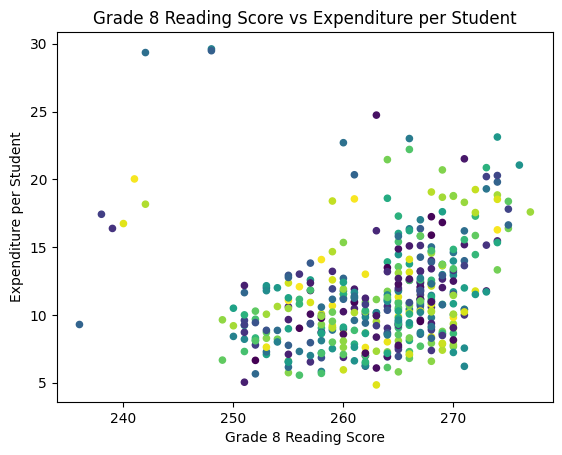

In [ ]:
colors = np.random.rand(1715)
states.plot.scatter(x = 'avg_reading_8_score', y = 'expenditure_per_student', c = colors)
plt.title('Grade 8 Reading Score vs Expenditure per Student')
plt.xlabel('Grade 8 Reading Score')
plt.ylabel('Expenditure per Student')

**<CAPTION FOR VIZ 1>** Seemingly strong relationship... a few outliers, but not that many.

**Visualization 2**

Text(0, 0.5, 'Support Services Expenditure per Student')

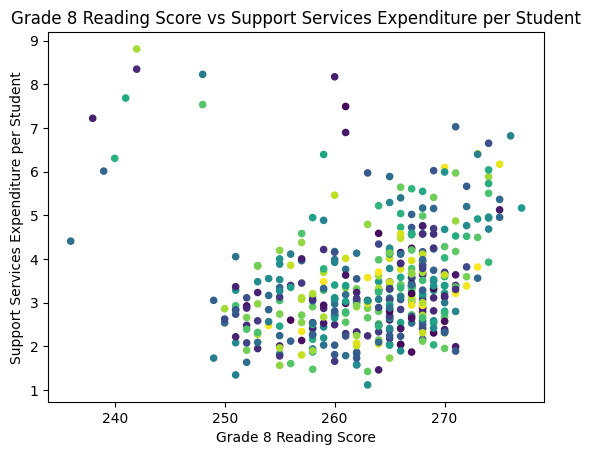

In [ ]:
colors = np.random.rand(1715)
states.plot.scatter(x = 'avg_reading_8_score', y = 'services_per_student', c = colors)
plt.title('Grade 8 Reading Score vs Support Services Expenditure per Student')
plt.xlabel('Grade 8 Reading Score')
plt.ylabel('Support Services Expenditure per Student')

**<CAPTION FOR VIZ 2>** Strong, correlation. More outliers here but there seems to be a relationship with more support spending and higher scores.

<Axes: ylabel='Frequency'>

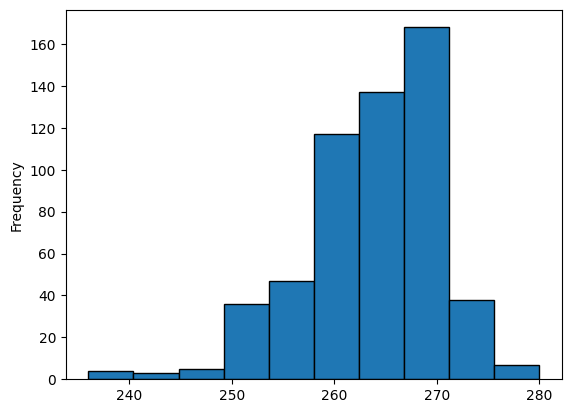

In [ ]:
# histogram of response variable just to see distribution: it is left skewed

states.avg_reading_8_score.plot.hist(edgecolor = 'black')

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = states[['expenditure_per_student','services_per_student', 'instruction_expenditure']].dropna()
y = states.loc[x.index]['avg_math_8_score']
y.fillna(y.median(), inplace=True) # data is left skewed


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# create your model here
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
np.mean(y_test - y_pred) # mean error should be around 0

-0.43852715026801087

<Axes: ylabel='Frequency'>

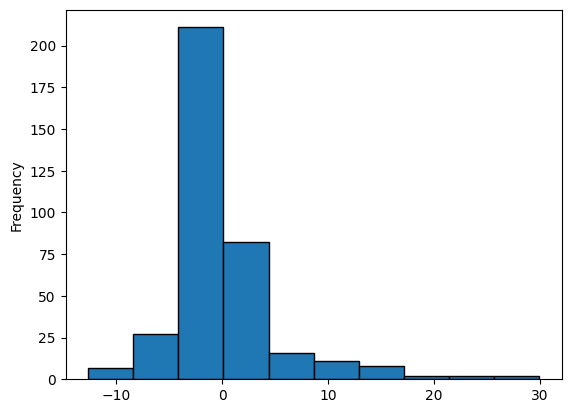

In [ ]:
residuals = model.predict(x_test)-y_test  # mostly normally distributed

residuals.plot.hist(edgecolor = 'black')

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

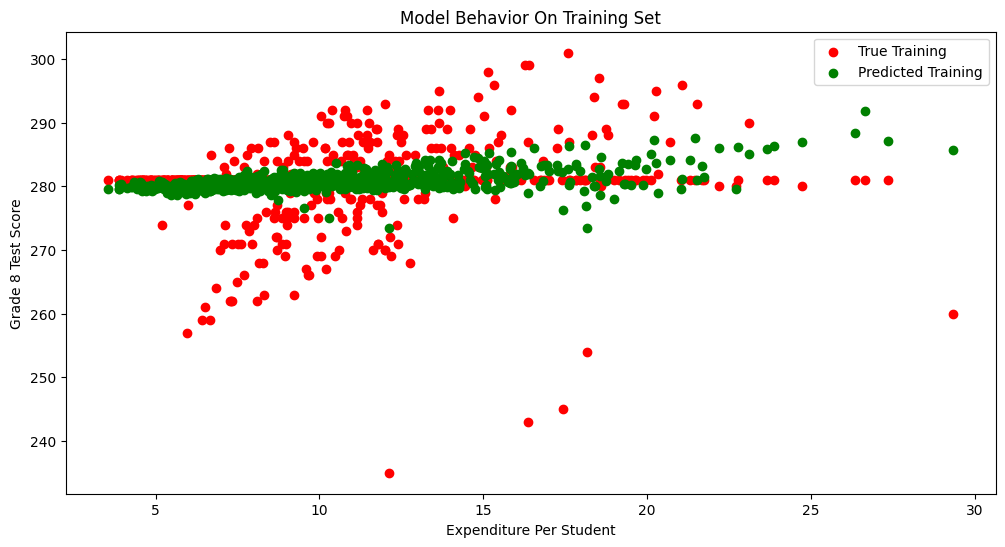

In [ ]:
col_name = 'expenditure_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(x_train['expenditure_per_student'], y_train, color = "red")
plt.scatter(x_train['expenditure_per_student'], model.predict(x_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel('Expenditure Per Student')
plt.ylabel('Grade 8 Test Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

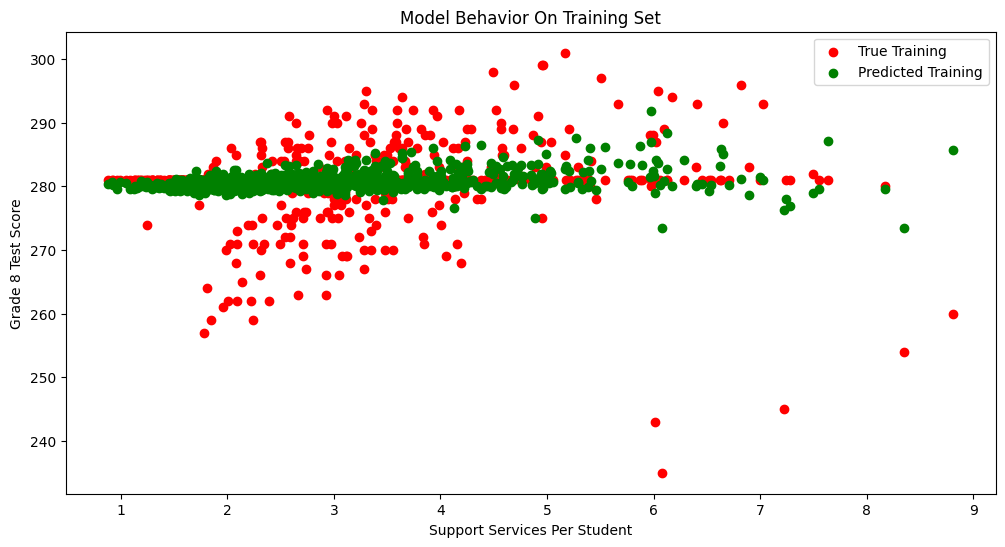

In [ ]:
col_name = 'services_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(x_train['services_per_student'], y_train, color = "red")
plt.scatter(x_train['services_per_student'], model.predict(x_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel('Support Services Per Student')
plt.ylabel('Grade 8 Test Score')
plt.title("Model Behavior On Training Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

My model was not perfect, but strong enough. You can see that the residuals are normally distributed with a mean around zero, and that the model perfectly predicted some points while completely missing others. However, you can see that there are some schools with higher spending/support services with lower scores, whereas the opposite is not as frequent. the graphs are also skewed since there was a lot of missing data, most of which I filled in using the median of the test scores. That is why so much data is concentrated in a line. If I could re do this, I would choose data that has less missing values, since I am sure that it would lead to a different conclusion.